In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

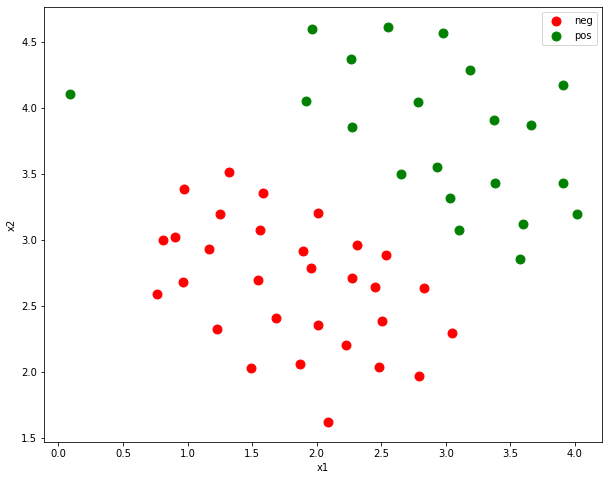

In [3]:
import utils 
from sklearn import preprocessing, metrics

X,y = utils.load_mat('data/ex4data1.mat')

utils.plot_twoclass_data(X,y,'x1', 'x2',['neg','pos'])
plt.show()

## Question 1 Implement SVM with sklearn

Implement SVM classifier to classify the dataset, and vary the value of C. What do you observe ?

Accuracy on training data = 1.000


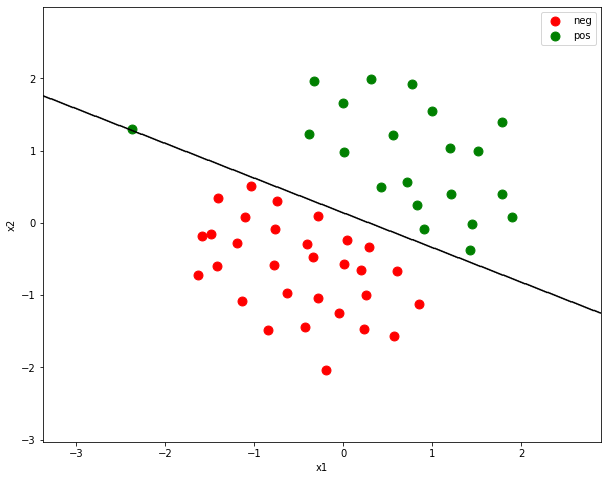

In [4]:
from sklearn.svm import LinearSVC

# scale the data
scaler = preprocessing.StandardScaler().fit(X)
scaleX = scaler.transform(X)

# add an intercept term and convert y values from [0,1] to [-1,1]
XX = np.array([(1,x1,x2) for (x1,x2) in scaleX])
yy = np.ones(y.shape)
yy[y == 0] = -1
yy[y == 0] = -1

#  Training linear SVM                                                    

C = 15

svc_lin = LinearSVC(C=C, loss='hinge')

svc_lin.fit(XX, yy)

y_pred = svc_lin.predict(XX)

print("Accuracy on training data = %.3f" %metrics.accuracy_score(yy,y_pred))

# visualize the decision boundarFy
utils.plot_decision_boundary(scaleX,y,svc_lin,'x1','x2',['neg','pos'])

## Add PolynomialFeatures

Accuracy on training data = 1.000


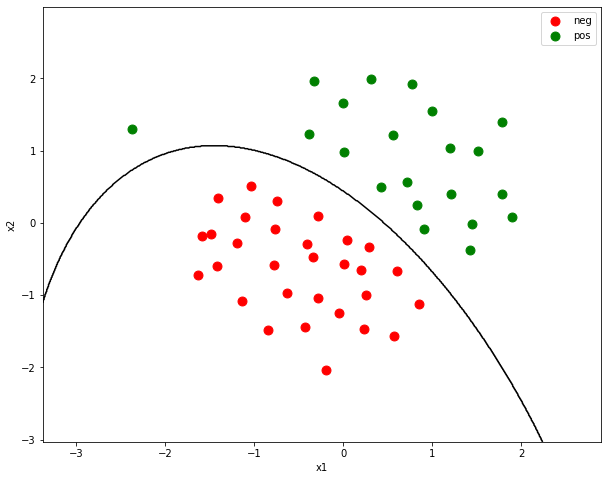

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

ply_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('svc_lin', LinearSVC(C=10, loss='hinge'))
])

ply_pipe.fit(XX, yy)
y_pred = svc_lin.predict(XX)
print("Accuracy on training data = %.3f" %metrics.accuracy_score(yy,y_pred))
utils.plot_decision_boundary(scaleX,y,ply_pipe,'x1','x2',['neg','pos'])